# Análise de Dados do Google Play Store App's Rating
<br>
<br>
<br>
<br>
<br>


## Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Lendo os dados do meu github

In [4]:
# Fazendo a leitura do Dataset que está em meu github
df = pd.read_csv("https://github.com/vinibeni28/Google-Play-Store-Rating-DataAnalysis/blob/master/googleplaystore.csv?raw=true")
# Imprimindo as 5 primeiras linhas
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [7]:
# Analisando quantas colunas e quantas linhas tem meu dataset.
df.shape

(10841, 13)

In [9]:
# Sumário da Estatística
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

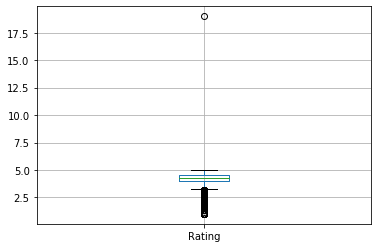

In [10]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195B4167788>]],
      dtype=object)

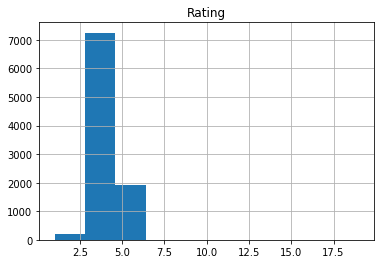

In [11]:
df.hist()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning / Limpando os Dados

 Primeiro vamos contar o numero de dados que estão faltando no Dataset

In [13]:
# Esse metodo vai mostrar onde eu tenho nulos.
df.isnull()

App  Category  Rating  Reviews   Size  Installs   Type  Price  \
0      False     False   False    False  False     False  False  False   
1      False     False   False    False  False     False  False  False   
2      False     False   False    False  False     False  False  False   
3      False     False   False    False  False     False  False  False   
4      False     False   False    False  False     False  False  False   
...      ...       ...     ...      ...    ...       ...    ...    ...   
10836  False     False   False    False  False     False  False  False   
10837  False     False   False    False  False     False  False  False   
10838  False     False    True    False  False     False  False  False   
10839  False     False   False    False  False     False  False  False   
10840  False     False   False    False  False     False  False  False   

       Content Rating  Genres  Last Updated  Current Ver  Android Ver  
0               False   False         False        False        False  
1               False   False         False        False        False  
2               False   False         False        False        False  
3               False   False         False        False        False  
4               False   False         False        False        False  
...               ...     ...           ...          ...          ...  
10836           False   False         False        False        False  
10837           False   False         False        False        False  
10838           False   False         False        False        False  
10839           False   False         False        False        False  
10840           False   False         False        False        False  

[10841 rows x 13 columns]

In [15]:
# Após verificar os dados vamos contar quantos nulo temos em cada coluna.
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [22]:
# Como mostrado acima se o dado é maior que 5 então ele é um outlier.
# Vamos contar quantos dados são maiores que 5, ou seja, quantos outliers nós temos na coluna rating.
df[df.Rating > 5]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [23]:
# Remove Outlier
df.drop([10472],inplace = True)

In [24]:
# Verificar se a linha foi realmente deletada. 
df[10470:10475]

App         Category  Rating Reviews  Size  \
10470               Jazz Wi-Fi    COMMUNICATION     3.4      49  4.0M   
10471         Xposed Wi-Fi-Pwd  PERSONALIZATION     3.5    1042  404k   
10473  osmino Wi-Fi: free WiFi            TOOLS     4.2  134203  4.1M   
10474             Sat-Fi Voice    COMMUNICATION     3.4      37   14M   
10475         Wi-Fi Visualizer            TOOLS     3.9     132  2.6M   

          Installs  Type Price Content Rating           Genres  \
10470      10,000+  Free     0       Everyone    Communication   
10471     100,000+  Free     0       Everyone  Personalization   
10473  10,000,000+  Free     0       Everyone            Tools   
10474       1,000+  Free     0       Everyone    Communication   
10475      50,000+  Free     0       Everyone            Tools   

            Last Updated Current Ver   Android Ver  
10470  February 10, 2017         0.1    2.3 and up  
10471     August 5, 2014       3.0.0  4.0.3 and up  
10473     August 7, 2018     6.06.14    4.4 and up  
10474  November 21, 2014     2.2.1.5    2.2 and up  
10475       May 17, 2017       0.0.9    2.3 and up

In [25]:
df[df.Rating > 5] # Confirmando se não há rating maior que 5. É possível verificar que não há mais linhas.

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

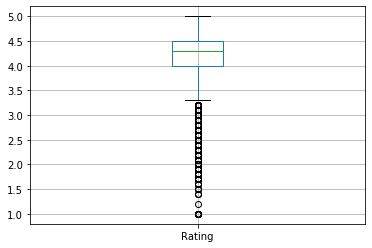

In [27]:
# Montando o boxplot novamente
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195B43CEE48>]],
      dtype=object)

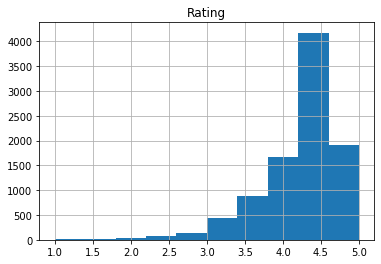

In [28]:
# Montando o histograma novamente sem o outlier
df.hist()